## Extract Data from Zip File

In [1]:
import zipfile
import os

# Writing function to unzip the training data zip file
# and storing it out in a folder

def unzip_file(zip_file, extract_to):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

zip_file = '/content/dataset.zip'
extract_to = 'dataset'

if not os.path.exists(extract_to):
    os.makedirs(extract_to)

unzip_file(zip_file, extract_to)


## Imports and Initializations

This section will basically initialize, download and import any/all neccessary packages. NOTE that this has been made for Current Version of Google Colab for testing

In [12]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.2 MB/

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from statsmodels.formula.api import ols
from pycaret.regression import *
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

import joblib
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm


## Preliminary Exploration

In [3]:
# Loading the dataframe from the folder we just stored it into from the unzipping process
df = pd.read_csv('dataset/dataset/train.csv')
df

,Unnamed: 0,AT,V,AP,RH,PE
0,0,14.96,41.76,1024.07,73.17,463.27
1,1,25.18,62.96,1020.04,59.08,444.37
2,2,5.11,39.40,1012.16,92.14,488.56
3,3,20.86,57.32,1010.24,76.64,446.48
4,4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...,...
7495,7495,15.37,43.67,1011.90,91.48,468.23
7496,7496,22.30,57.19,1006.40,75.28,445.10
7497,7497,18.64,43.79,1016.01,51.17,465.13
7498,7498,7.30,39.72,1020.85,77.83,485.10


In [4]:
# Reordering the columns to match the problem statement structuring
df = df[['AT', 'AP', 'RH', 'V', 'PE']]
df

,AT,AP,RH,V,PE
0,14.96,1024.07,73.17,41.76,463.27
1,25.18,1020.04,59.08,62.96,444.37
2,5.11,1012.16,92.14,39.40,488.56
3,20.86,1010.24,76.64,57.32,446.48
4,10.82,1009.23,96.62,37.50,473.90
...,...,...,...,...,...
7495,15.37,1011.90,91.48,43.67,468.23
7496,22.30,1006.40,75.28,57.19,445.10
7497,18.64,1016.01,51.17,43.79,465.13
7498,7.30,1020.85,77.83,39.72,485.10


In [5]:
# Checking the overall view of the Data to check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7500 non-null   float64
 1   AP      7500 non-null   float64
 2   RH      7500 non-null   float64
 3   V       7500 non-null   float64
 4   PE      7500 non-null   float64
dtypes: float64(5)
memory usage: 293.1 KB


 - No null or missing values

In [6]:
## Obtaining an initial statistical summary of the data
df.describe()

,AT,AP,RH,V,PE
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,19.610499,1013.294247,73.295064,54.223009,454.475605
std,7.458034,5.953382,14.620099,12.717090,17.099312
min,1.810000,993.310000,25.890000,25.360000,421.570000
25%,13.480000,1009.170000,63.320000,41.670000,439.800000
50%,20.300000,1012.990000,74.965000,52.050000,451.695000
75%,25.690000,1017.330000,84.880000,66.510000,468.632500
max,37.110000,1033.300000,100.160000,81.560000,495.760000


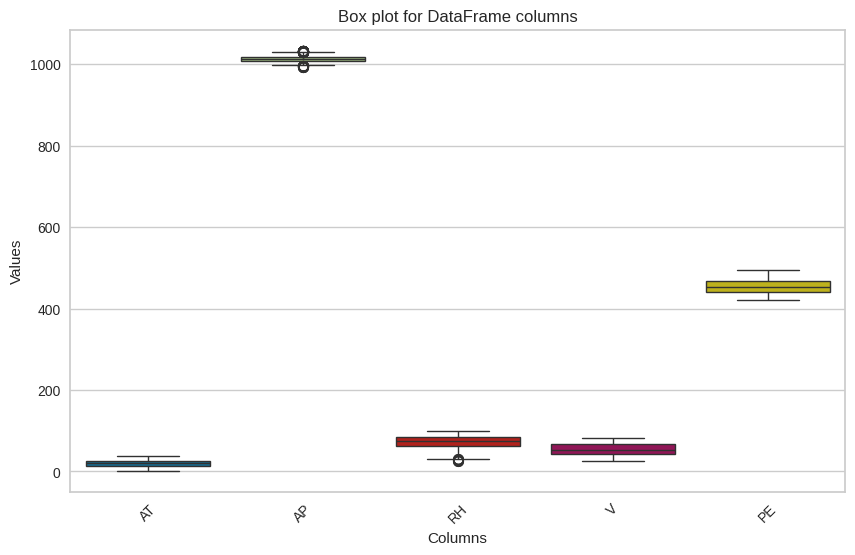

In [71]:
## Generating a Box Plot for each feature and the target variable to showcase distribution / outliers

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)

plt.title('Box plot for DataFrame columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)

plt.show()

In [7]:
## Performing Sanity Checks to ensure that the data is within specified ranges
## As per problem statement

print("Minimum Ambient Temperature: ", df['AT'].min())
print("Maximum Ambient Temperature: ", df['AT'].max())

print("Minimum Ambient Pressure: ", df['AP'].min())
print("Maximum Ambient Pressure: ", df['AP'].max())

print("Minimum Relative Humidity: ", df['RH'].min())
print("Maximum Relative Humidity: ", df['RH'].max())

print("Minimum Exhaust Vacuum: ", df['V'].min())
print("Maximum Exhaust Vacuum: ", df['V'].max())

print("Minimum Power Output: ", df['PE'].min())
print("Maximum Power Output: ", df['PE'].max())

Minimum Ambient Temperature:  1.81
Maximum Ambient Temperature:  37.11
Minimum Ambient Pressure:  993.31
Maximum Ambient Pressure:  1033.3
Minimum Relative Humidity:  25.89
Maximum Relative Humidity:  100.16
Minimum Exhaust Vacuum:  25.36
Maximum Exhaust Vacuum:  81.56
Minimum Power Output:  421.57
Maximum Power Output:  495.76


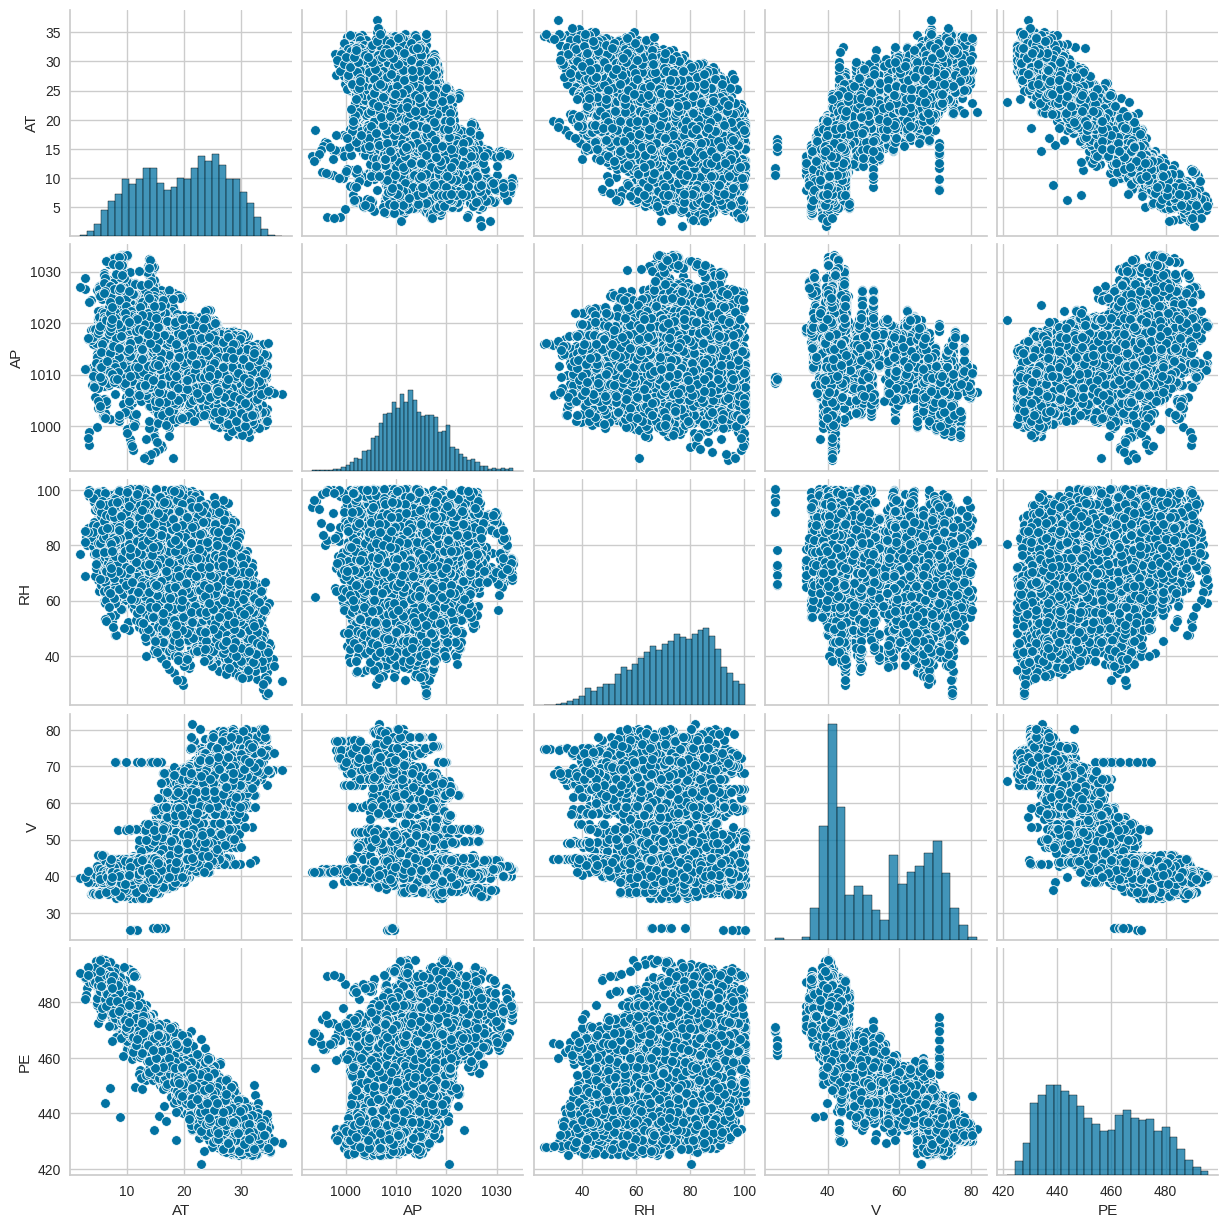

In [8]:
## Plotting pair plots for the features in the data
## Against themselves and the target variable
sns.pairplot(df)
plt.show()

## Correlation Analysis

In [9]:
## Performing Hypothesis testing to check for statistical significance
## and relevance of each feature in their correlation with target variable "PE"

for column in df.columns[:-1]:
    print(f"\nHypothesis testing for {column} and Power Output:")
    print(stats.pearsonr(df[column], df['PE']))



Hypothesis testing for AT and Power Output:
PearsonRResult(statistic=-0.9485873278228161, pvalue=0.0)

Hypothesis testing for AP and Power Output:
PearsonRResult(statistic=0.5210344044998444, pvalue=0.0)

Hypothesis testing for RH and Power Output:
PearsonRResult(statistic=0.3839834202203081, pvalue=4.5857987328511734e-262)

Hypothesis testing for V and Power Output:
PearsonRResult(statistic=-0.8690113100552053, pvalue=0.0)


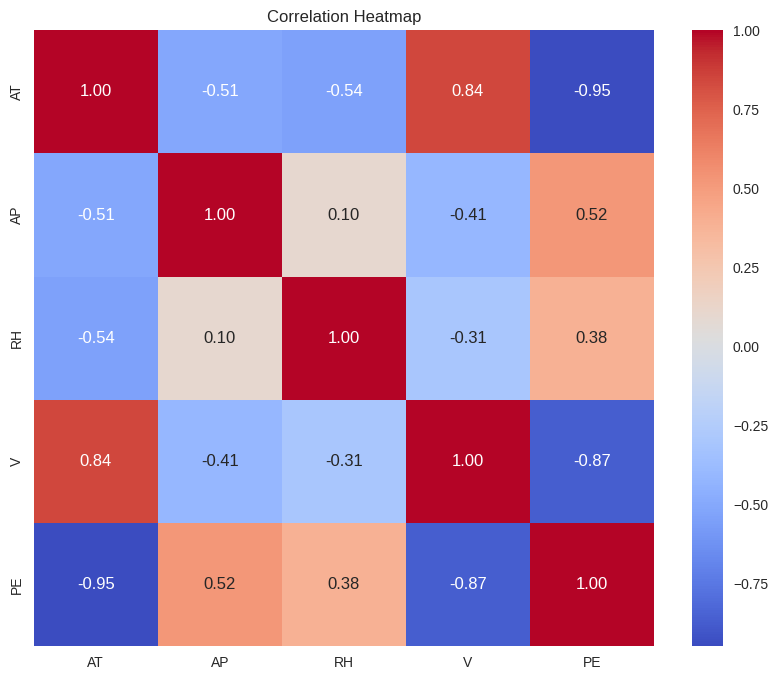

In [10]:
## Expanded Continuation of the Hypothesis testing and pairplot
## To arrive at a concrete visualization of Correlations as a heatmap
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Splitting data

In [11]:
## Dropping PE for X as it is the target variable
X = df.drop(columns=['PE'])
y = df['PE']

In [12]:
## Performing test_train split on X, Y (Unscaled)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardization and Unseen Test Data Split

In [72]:
## using standard Scaler to standardize the entire dataframe
## This ensures the variability within features doesn't skew the prediction by much

## Once predictions are generated, we shall then unscale them back for compared performance analysis
scaler = StandardScaler()

scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

scaled_df.head()

,AT,AP,RH,V,PE
0,-0.623597,1.810143,-0.008555,-0.980086,0.514347
1,0.746829,1.133172,-0.972361,0.687073,-0.591034
2,-1.944409,-0.190534,1.289061,-1.165675,1.993453
3,0.167549,-0.513061,0.228806,0.243546,-0.467629
4,-1.178740,-0.682724,1.595508,-1.315091,1.136051


In [14]:
## Storing Scaler as a pickle so that future data can be loaded into it for same standardization
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [15]:
## Performing the Test Train Split for the Scaled and Standardized Data

X_scaled = scaled_df.drop(columns=['PE'])
y_scaled = scaled_df['PE']

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [16]:
## Segmenting a portion of the data to be held back from training to see how model performs on unseen data

unseen_val_df = scaled_df.sample(frac = 0.2, random_state = 42)
scaled_df = scaled_df.drop(unseen_val_df.index)
scaled_df.reset_index(drop=True, inplace=True)
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      6000 non-null   float64
 1   AP      6000 non-null   float64
 2   RH      6000 non-null   float64
 3   V       6000 non-null   float64
 4   PE      6000 non-null   float64
dtypes: float64(5)
memory usage: 234.5 KB


## Model Building and Iteration

In [17]:
## Seting up the regression pipeline and evaluating the best model for regression
## This is essentially our comprehensive model selection process

reg_setup = setup(data=scaled_df, target='PE', session_id=123)
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,PE
2,Target type,Regression
3,Original data shape,"(6000, 5)"
4,Transformed data shape,"(6000, 5)"
5,Transformed train set shape,"(4200, 5)"
6,Transformed test set shape,"(1800, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.1476,0.0408,0.2015,0.9585,0.1094,0.7197,0.1410
lightgbm,Light Gradient Boosting Machine,0.1559,0.0431,0.2072,0.9562,0.1130,0.8916,0.5110
et,Extra Trees Regressor,0.1532,0.0443,0.2099,0.9550,0.1141,0.8344,0.7930
rf,Random Forest Regressor,0.1558,0.0449,0.2112,0.9544,0.1149,0.8430,1.5810
gbr,Gradient Boosting Regressor,0.1753,0.0515,0.2266,0.9477,0.1249,1.0991,0.5700
knn,K Neighbors Regressor,0.1765,0.0548,0.2338,0.9443,0.1287,1.0450,0.0300
lar,Least Angle Regression,0.2112,0.0691,0.2628,0.9298,0.1412,0.9380,0.0230
br,Bayesian Ridge,0.2112,0.0691,0.2628,0.9298,0.1412,0.9380,0.0210
ridge,Ridge Regression,0.2112,0.0691,0.2628,0.9298,0.1412,0.9382,0.0230
lr,Linear Regression,0.2112,0.0691,0.2628,0.9298,0.1412,0.9380,0.6610


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [21]:
## From the above it is clear that XGB is the best performing model,
## We shall now, leverage that and tune it for our metrics to make sure model is optimized

optimize_metrics = ['RMSE','MSE','MAE', 'R2']
tuned_xgb = tune_model(best_model, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1473,0.0353,0.1880,0.9650,0.1077,0.7679
1,0.1481,0.0398,0.1996,0.9605,0.1069,0.5570
2,0.1610,0.0445,0.2109,0.9562,0.1173,0.6694
3,0.1526,0.0449,0.2119,0.9544,0.1198,0.4762
4,0.1495,0.0441,0.2101,0.9525,0.1124,0.8867
5,0.1548,0.0399,0.1996,0.9592,0.1127,0.6099
6,0.1570,0.0428,0.2069,0.9582,0.1133,0.5514
7,0.1449,0.0343,0.1851,0.9659,0.1044,0.5164
8,0.1488,0.0382,0.1955,0.9606,0.1026,2.8158


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [23]:
# Get the Best Hyperparameters from the Tuned Model

best_params = tuned_xgb.get_xgb_params()
print(best_params)

{'objective': 'reg:squarederror', 'base_score': None, 'booster': 'gbtree', 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': 'cpu', 'eval_metric': None, 'gamma': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 123, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': 'auto', 'validate_parameters': None, 'verbosity': 0}


## Building a custom Best Model with Identified Best Params

In [32]:
## Now we shall use the best parameters identified to build a custom XGB model

xgb = XGBRegressor(**best_params)
xgb.fit(X_train_scaled, y_train_scaled)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=123, ...)

## Feature Importance and Contribution Analysis

In [22]:
# Get the Feature Importances from the XGB Pycaret Version
tuned_xgb.feature_importances_

array([0.9055061 , 0.01625654, 0.01741062, 0.06082672], dtype=float32)

In [33]:
## Calculate the importance of each feature through fitting it through the test data

perm_importance_xgb = permutation_importance(xgb, X_test_scaled, y_test_scaled, n_repeats=30, random_state=42)

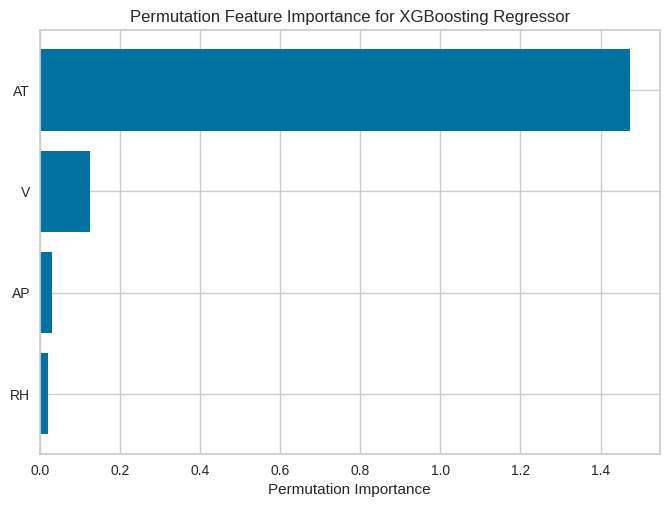

In [34]:
## Plotting feature importances for visualization
sorted_idx_xgb = perm_importance_xgb.importances_mean.argsort()
plt.barh(X.columns[sorted_idx_xgb], perm_importance_xgb.importances_mean[sorted_idx_xgb])
plt.xlabel("Permutation Importance")
plt.title("Permutation Feature Importance for XGBoosting Regressor")
plt.show()

## Predicting on Test Data

In [35]:
## Predicting Values for PE through our XGB model
y_pred_xgb_scaled = xgb.predict(X_test_scaled)

In [36]:
y_pred_xgb_scaled

array([-1.4594669 , -0.2979419 , -0.44662657, ..., -1.2575787 ,
        0.274586  ,  0.78718674], dtype=float32)

In [37]:
## Predicting values on unseen test data that was segmented through our XGB Model (PYCaret Version)
predictions = predict_model(tuned_xgb, data=unseen_val_df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,0.1416,0.0359,0.1895,0.9645,0.1022,0.6599


## Reverse Scaling for Organized Evaluation

In this section, we are essentially going to be restructuring and inverse scaling our data so that we can compare performances with better context

In [41]:
concatenated_data_scaled = np.concatenate((X_test_scaled, y_pred_xgb_scaled.reshape(-1, 1)), axis=1)

In [42]:
concatenated_data_unscaled = scaler.inverse_transform(concatenated_data_scaled)

In [43]:
y_pred_xgb_unscaled = concatenated_data_unscaled[:, -1]

In [44]:
X_test_unscaled = concatenated_data_unscaled[:, :-1]

## Performance Evaluation

In [46]:
# Evaluate the model on unscaled predictions
mse_unscaled = mean_squared_error(y_test, y_pred_xgb_unscaled)
mae_unscaled = mean_absolute_error(y_test, y_pred_xgb_unscaled)
r2_unscaled = r2_score(y_test, y_pred_xgb_unscaled)

print("Mean Squared Error (unscaled):", mse_unscaled)
print("Mean Absolute Error (unscaled):", mae_unscaled)
print("R-squared (unscaled):", r2_unscaled)


Mean Squared Error (unscaled): 9.244775551774337
Mean Absolute Error (unscaled): 2.288731552566263
R-squared (unscaled): 0.9687845028368276


In [73]:
# Evaluate the model on scaled predictions
mse_scaled = mean_squared_error(y_test_scaled, y_pred_xgb_scaled)
mae_scaled = mean_absolute_error(y_test_scaled, y_pred_xgb_scaled)
r2_scaled = r2_score(y_test_scaled, y_pred_xgb_scaled)

print("Mean Squared Error (scaled):", mse_scaled)
print("Mean Absolute Error (scaled):", mae_scaled)
print("R-squared (scaled):", r2_scaled)

Mean Squared Error (scaled): 0.031622558434513504
Mean Absolute Error (scaled): 0.13385825923950437
R-squared (scaled): 0.9687845028368276


## Finalizing Model and Pickling

In [75]:
## Finalizing the Pycaret model, saving it out for future usability
## Pickling the XGB model, saving it out for future usability

final_pycaret_model = finalize_model(tuned_xgb)
save_model(final_pycaret_model, 'final_pycaret_model')

with open('final_xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb, f)

Transformation Pipeline and Model Successfully Saved


## Statistical Regressor

In [52]:
## Seeing if a custom regression model through OLS is comparable in performance

# Adding a constant term for the intercept
X_with_intercept = sm.add_constant(scaled_df.drop(columns='PE'))  # Exclude the target variable

# Fitting OLS model
model = sm.OLS(scaled_df['PE'], X_with_intercept).fit()

# Printing out the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 1.960e+04
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        03:43:10   Log-Likelihood:                -570.52
No. Observations:                6000   AIC:                             1151.
Df Residuals:                    5995   BIC:                             1185.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0025      0.003     -0.713      0.4

In [56]:
## We shall use the above statistical OLS based Regressor model to get predictions for PE
## Then we shall unscale them for context comparability, and see how it performs
X_test_with_intercept = sm.add_constant(unseen_val_df.drop(columns='PE'))
predictions = model.predict(X_test_with_intercept)
predictions

970    -1.146640
6279   -0.136072
1859   -0.304239
6803    1.230767
6305   -0.705751
          ...   
6434   -0.572266
5441    1.160176
2760   -1.163494
4588    0.785413
2669    0.715712
Length: 1500, dtype: float64

In [57]:
## Much like prior models, we are reshaping, restructuring, and performing inverse scaling
concatenated_data = np.concatenate((unseen_val_df.drop(columns='PE'), predictions.values.reshape(-1, 1)), axis=1)
concatenated_df = pd.DataFrame(concatenated_data, columns=unseen_val_df.drop(columns='PE').columns.tolist() + ['PE'])

In [58]:
concatenated_stat_data_unscaled = scaler.inverse_transform(concatenated_data)

In [59]:
y_pred_stat_unscaled = concatenated_stat_data_unscaled[:, -1]
X_test_stat_unscaled = concatenated_stat_data_unscaled[:, :-1]

In [60]:
## Evaluating performance of unscaled predictions
mse_stat_unscaled = mean_squared_error(y_test, y_pred_stat_unscaled)
mae_stat_unscaled = mean_absolute_error(y_test, y_pred_stat_unscaled)
r2_stat_unscaled = r2_score(y_test, y_pred_stat_unscaled)

print("Mean Squared Error (unscaled):", mse_stat_unscaled)
print("Mean Absolute Error (unscaled):", mae_stat_unscaled)
print("R-squared (unscaled):", r2_stat_unscaled)

Mean Squared Error (unscaled): 19.88789680594963
Mean Absolute Error (unscaled): 3.573461176266459
R-squared (unscaled): 0.9328474138878976


In [76]:
## Evaluating performance of scaled predictions
mse_stat_scaled = mean_squared_error(y_test_scaled, predictions)
mae_stat_scaled = mean_absolute_error(y_test_scaled, predictions)
r2_stat_scaled = r2_score(y_test_scaled, predictions)

print("Mean Squared Error (scaled):", mse_stat_scaled)
print("Mean Absolute Error (scaled):", mae_stat_scaled)
print("R-squared (scaled):", r2_stat_scaled)

Mean Squared Error (scaled): 0.06802827990399521
Mean Absolute Error (scaled): 0.20899667852205706
R-squared (scaled): 0.9328474138878976


In [64]:
# Pickling the statsmodels model, Saving it out for future usability
with open('ols_model.pkl', 'wb') as f:
    pickle.dump(model, f)


## Final Model Summary

In [65]:
model_metrics = {
    'Model_name': ['PyCaret_XGB', 'XGB_unscaled', 'XGB_scaled', 'OLS_unscaled', 'OLS_scaled'],
    'MAE': [0.1416, mae_unscaled, mae_scaled, mae_stat_unscaled, mae_stat_scaled],
    'MSE': [0.0359, mse_unscaled, mse_scaled, mse_stat_unscaled, mse_stat_scaled],
    'R2' : [0.1895, r2_unscaled, r2_scaled, r2_stat_unscaled, r2_stat_scaled]
}

## Essentially creating a dataframe that has the entire model performance summary for all the work in this NoteBook
final_model_performance_summary_df = pd.DataFrame(model_metrics)

final_model_performance_summary_df

,Model_name,MAE,MSE,R2
0,PyCaret_XGB,0.141600,0.035900,0.189500
1,XGB_unscaled,2.288732,9.244776,0.968785
2,XGB_scaled,0.133858,0.031623,0.968785
3,OLS_unscaled,3.573461,19.887897,0.932847
4,OLS_scaled,0.208997,0.068028,0.932847


In [66]:
final_model_performance_summary_df.to_csv('Final_model_performance_summary.csv')